 1° Análise Exploratória dos Dados

---

Interpretações clínicas suportadas
de mutações relacionadas ao câncer




##Bibliotecas

In [1]:
#Importações
import requests
import json
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px

##**Fonte:**
https://civic.readthedocs.io/en/latest/api.html

##Carregando os Dados

In [2]:
#Dados
df = pd.read_csv('/content/Civic (1) - Copia.csv')
# Vendo os primeiros registros
df.head(5)

,gene,entrez_id,variant,disease,doid,phenotypes,drugs,drug_interaction_type,evidence_type,evidence_direction,...,variant_summary,variant_origin,is_flagged,variant_types,hgvs_expressions,civic_variant_evidence_score,allele_registry_id,clinvar_ids,variant_aliases,description
0,JAK2,3717,V617F,Lymphoid Leukemia,1037.0,NaN,NaN,NaN,Diagnostic,Supports,...,JAK2 V617F is a highly recurrent mutation in m...,Somatic,False,"missense_variant,gain_of_function_variant","NC_000009.11:g.5073770G>T,NM_004972.3:c.1849G>...",83.0,CA124183,14662,"VAL617PHE,RS77375493",JAK2 is a kinase that is misregulated or mutat...
1,PDGFRA,5156,D842V,Gastrointestinal Stromal Tumor,9253.0,NaN,NaN,NaN,Diagnostic,Supports,...,PDGFRA D842 mutations are characterized broadl...,Somatic,False,missense_variant,"NM_006206.4:c.2525A>T,NP_006197.1:p.Asp842Val,...",100.5,CA123194,13543,"ASP842VAL,RS121908585","Commonly mutated in GI tract tumors, PDGFR fam..."
2,DNMT3A,1788,R882,Acute Myeloid Leukemia,9119.0,NaN,NaN,NaN,Diagnostic,Supports,...,DNMT3A R882 mutations are associated with cyto...,Somatic,False,missense_variant,NaN,510.0,NaN,"375882,375883,375884,375879,375880,375881","R693,ARG882,ARG693",DNMT3A is one of several epigenetic modifiers ...
3,DNMT3A,1788,R882,Acute Myeloid Leukemia,9119.0,NaN,NaN,NaN,Diagnostic,Supports,...,DNMT3A R882 mutations are associated with cyto...,Somatic,False,missense_variant,NaN,510.0,NaN,"375882,375883,375884,375879,375880,375881","R693,ARG882,ARG693",DNMT3A is one of several epigenetic modifiers ...
4,JAK2,3717,V617F,Chronic Myeloid Leukemia,8552.0,NaN,NaN,NaN,Diagnostic,Supports,...,JAK2 V617F is a highly recurrent mutation in m...,Somatic,False,"missense_variant,gain_of_function_variant","NC_000009.11:g.5073770G>T,NM_004972.3:c.1849G>...",83.0,CA124183,14662,"VAL617PHE,RS77375493",JAK2 is a kinase that is misregulated or mutat...


In [3]:
# Verificar as colunas disponíveis no DataFrame
print(df.columns)

Index(['gene', 'entrez_id', 'variant', 'disease', 'doid', 'phenotypes',
       'drugs', 'drug_interaction_type', 'evidence_type', 'evidence_direction',
       'evidence_level', 'clinical_significance', 'evidence_statement',
       'citation_id', 'source_type', 'citation', 'rating', 'evidence_status',
       'evidence_id', 'variant_id', 'gene_id', 'chromosome', 'start', 'stop',
       'reference_bases', 'variant_bases', 'representative_transcript',
       'ensembl_version', 'reference_build', 'variant_summary',
       'variant_origin', 'is_flagged', 'variant_types', 'hgvs_expressions',
       'civic_variant_evidence_score', 'allele_registry_id', 'clinvar_ids',
       'variant_aliases', 'description'],
      dtype='object')


##Detalhes de Genes de MyGene

In [4]:
# Contando a frequência de gene
gene_counts = df['gene'].value_counts().reset_index()
gene_counts.columns = ['gene', 'count']
gene_counts

,gene,count
0,VHL,622
1,ABL1,376
2,EGFR,233
3,BRAF,225
4,KRAS,189
...,...,...
327,ETS2,1
328,KRT18,1
329,FGF13,1
330,SSX4,1


In [5]:
# Pegar os 10 genes mais frequentes
top_genes = gene_counts.head(10)  
categorias = top_genes['gene']
valores = top_genes['count']

In [6]:
# Criar um objeto figura
fig = go.Figure()

# Adicionar um gráfico de barras
fig.add_trace(go.Bar(x=categorias, y=valores, name='Genes Mais Frequentes',
                     text=valores, textposition='auto',
                     marker_color='green'
                     )) # Cor das barras)  # Adicionar marcadores de valores
                     
# Personalizar o layout do gráfico
fig.update_layout(title='Genes Mais Frequentes',
                  xaxis_title='Genes',
                  yaxis_title='Contagem de Frequência')

# Exibir o gráfico
fig.show()

Este código gerar um gráfico de thread com os 10 nome de gene mais frequentes, onde cada fatia representa uma contagem correspondente de cada nome gene.

##Principais Variantes mais Frequente do Dataset

---



In [7]:
# Contar os valores únicos na coluna 'variant'
variante_counts = df['variant'].value_counts().head(5)

In [8]:
# Criar o gráfico de barras
fig = go.Figure()

# Adicionar os dados ao gráfico
fig.add_trace(go.Bar(
    x=variante_counts.index, # Valores únicos da coluna 'variant' no eixo x
    y=variante_counts.values, # Contagem dos valores únicos no eixo y
    marker_color='green' # Cor das barras
))
# Atualizar o layout do gráfico
fig.update_layout(
    title='Principais Variantes',
    xaxis=dict(title='Variantes'),
    yaxis=dict(title='Contagem'),
    showlegend=False, # Não mostrar a legenda
)

# Mostrar o gráfico
fig.show()

Nesse exemplo estão os dados das principais variantes genéticas representados nas listas variantese frequencias.

## Ontologia da Doenças de Câncer


In [9]:
# Filtrar apenas a doenças de câncer
cancer_diseases = ['Cancer']
df_cancer = df[df['disease'].isin(cancer_diseases)]

In [10]:
# Filtrar as colunas de interesse (variant, disease, clinical_significance)
df_cancer = df_cancer[['variant', 'disease', 'clinical_significance']]

# Agrupar os dados por variant, disease e clinical_significance, e contar a ocorrência de cada combinação
variant_disease_action_counts = df_cancer.groupby(['variant', 'disease', 'clinical_significance']).size().reset_index(name='count')

# Ordenar os dados por count em ordem decrescente
variant_disease_action_counts = variant_disease_action_counts.sort_values(by='count', ascending=False)

# Filtrar apenas as top 10 variantes mais frequentes para cada doença
variant_disease_action_counts_top10 = variant_disease_action_counts.groupby('disease').head(10)

In [11]:
# Criar um gráfico de barras
fig = px.bar(variant_disease_action_counts_top10, x='variant', y='count', color='clinical_significance',
             facet_col='disease', facet_col_wrap=3, facet_row_spacing=0.02,
             labels={'variant': 'Variante', 'count': 'Contagem', 'clinical_significance': 'Ação Clínica', 'disease': 'Doença'},
             title='Variantes de Câncer Primario e Ações Clínicas')

# Exibir o gráfico
fig.show()

agrupamos os dados por doença e selecionar as 10 principais variantes mais frequentes para cada doença de câncer selecionada, e em seguida mostrar sua ação clinica.

##Tipo Evidências Clinica para  Predisposição ao Câncer ou Diagnóstico

In [12]:
#Contar frequências Tipo Evidencia 
frequency_counts = df['evidence_type'].value_counts()
frequency_counts

Predictive      2451
Predisposing     643
Prognostic       511
Diagnostic       194
Oncogenic         67
Functional        31
Name: evidence_type, dtype: int64

In [13]:
# Gráfico de barras
fig_bar = go.Figure(go.Bar(x=frequency_counts.index, y=frequency_counts.values, marker_color='green'))
fig_bar.update_layout(title='Frequências de Categorias', xaxis_title='Categoria', yaxis_title='Contagem',)
fig_bar.show()

# Gráfico de pizza
fig_pie = go.Figure(go.Pie(labels=frequency_counts.index, values=frequency_counts.values))
fig_pie.update_layout(title='Frequências de Categorias')
fig_pie.show()


O Tipo de Evidência refere-se ao tipo de associação clínica (ou biológica) descrita pelo resumo clínico do Item de Evidência.

**Preditivo**: Evidências pertencentes ao efeito de um Perfil Molecular na resposta terapêutica.

**Diagnóstico**: Evidências relativas ao impacto de um Perfil Molecular no diagnóstico do paciente.


**Prognóstico**: Evidências pertencentes ao impacto de um Perfil Molecular na progressão da doença, gravidade ou sobrevida do paciente

**Predispondo**: A evidência refere-se ao papel de um Perfil Molecular da linhagem germinativa em conferir suscetibilidade à doença (incluindo avaliações de patogenicidade)

**Oncogênico**: A evidência refere-se ao envolvimento de um perfil molecular somático na patogênese do tumor, conforme descrito pelo Hallmarks of Cancer

**Funcional**: A evidência refere-se ao impacto de um Perfil Molecular na função do produto gênico (por exemplo, proteína).


##Analísando Gene específico 

In [14]:
# Filtrar os dados para um gene específico
gene_alvo = 'KRAS' 
df_gene = df[df['gene'] == gene_alvo]

# Verificar se há dados para o gene alvo
if df_gene.empty:
    print(f"Não foram encontrados dados para o gene '{gene_alvo}'.")
else:
    # Contar frequências dos tipos de variantes
    tipos_variantes_counts = df_gene['variant_types'].value_counts().head(2)

    # Verificar se a sequência está vazia
    if tipos_variantes_counts.empty:
        print(f"Não foram encontrados tipos de variantes para o gene '{gene_alvo}'.")
    else:
        # Exibir os tipos de variantes do gene relacionado a doenças
        print(f"Tipos de variantes para o gene '{gene_alvo}':")
        print(tipos_variantes_counts)


Tipos de variantes para o gene 'KRAS':
missense_variant            110
protein_altering_variant     68
Name: variant_types, dtype: int64


In [15]:
#Filtrar as linhas que contêm o gene KRAS
gene_kras = df[df['gene'] == 'KRAS']

# Contar a ocorrência de cada doença associada ao gene KRAS
doencas_associadas = gene_kras['disease']#.value_counts()

# Obter as 3 principais doenças associadas ao gene KRAS
top_3_doencas = doencas_associadas.head(3)

# Exibir o resultado
print("As 3 principais doenças associadas ao gene KRAS:")
print(top_3_doencas)


As 3 principais doenças associadas ao gene KRAS:
6                    Acute Leukemia
30    Lung Non-small Cell Carcinoma
74                Colorectal Cancer
Name: disease, dtype: object


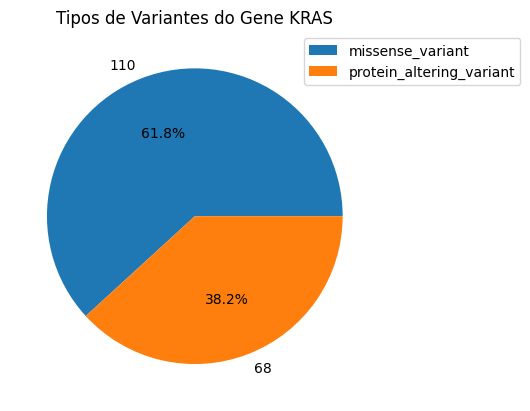

Principais Doenças Associadas ao Gene KRAS:
- Acute Leukemia
- Lung Non-small Cell Carcinoma
- Colorectal Cancer

Possíveis Terapias para a Variante missense_variant:
- Trametinibe
- Panitumumabe
- gefitinibe
- Erlotinibe
- Bevacizumabe
- Gemcitabinai
- rinotecano
- Quimioterapia
- Oxaliplatina


In [20]:
# Criar um gráfico de pizza com os tipos de variantes mais comuns
plt.pie(tipos_variantes_counts, labels=tipos_variantes_counts, autopct='%1.1f%%')
plt.title('Tipos de Variantes do Gene KRAS')
plt.legend(labels=tipos_variantes_counts.index, loc='upper right', bbox_to_anchor=(1.40, 1))
plt.show()

# Possíveis terapias para a variante missense_variant
terapias = ['Trametinibe','Panitumumabe','gefitinibe','Erlotinibe','Bevacizumabe','Gemcitabinai','rinotecano','Quimioterapia','Oxaliplatina']

# Exibir as informações sobre as doenças e terapias
print('Principais Doenças Associadas ao Gene KRAS:')
for doenca in top_3_doencas:
    print('- ' + doenca)
print('\nPossíveis Terapias para a Variante missense_variant:')
for terapia in terapias:
    print('- ' + terapia)


Esses resumos clínicos devem incluir subtipos de câncer relevantes, tratamentos específicos para variantes associadas ao gene, interações de vias, alterações funcionais causadas pelas variantes no gene e funções normais/anormais do gene com papéis associados na oncogênese.

##Relatório de Análise Exploratória de Dados da API CivicDB

A API fornece informações sobre genes associados a variantes e doenças. O conjunto de dados consiste em uma lista de genes, cada um com seus respectivos campos e valores.

1. Informações Gerais:


A API possui informações sobre 1402 genes.
Existem 3 campos obrigatórios para cada gene: "name", "entrez_id" e "variants_count"

2. Campos:

"gene": Nome do gene.
"entrez_id": ID do gene na base de dados NCBI Entrez.
"variants_count": Número de variantes associadas ao gene.
"description": Descrição do gene.
"aliases": Outros nomes pelos quais o gene é conhecido.
"tipo": Tipo de gene.
"location": Localização do gene.
"cromossomo": Cromossomo do gene.
"map_location": Localização no mapa genético.
"biotipo": Biótipo do gene.
"reference_genoma": Genoma de referência do gene.
"ensembl_id": ID do gene na base de dados Ensembl.
"símbolo": Símbolo do gene.
"hgnc_id": ID do gene na base de dados HGNC.
"summary": Resumo do gene.


3.   Distribuição dos dados:


O número de variantes associadas aos genes varia de 1 a 312.
A maioria dos genes tem menos de 50 variantes associadas.
Os genes estão distribuídos em diversos cromossomos.
Existem genes de diversos biótipos.



4.   Análise Adicional:


Seria interessante fazer uma análise de associação de genes com doenças e variantes para entender melhor a herança de cada gene na biologia e medicina.
Também seria interessante analisar a distribuição dos tipos de variantes associados a cada gene, para entender melhor o impacto das variantes no gene e suas funções biológicas.
Além disso, seria útil fazer uma análise de similaridade entre os genes com base em suas incorporadas e abstratas, para identificar possíveis grupos ou famílias de genes.




*   Conclusão: 

A API CivicDB fornece uma rica fonte de informações sobre genes, variantes e doenças. A análise exploratória realizada neste relatório mostra que existem diversos genes com diferentes níveis de resistência e associação com variantes. Uma análise mais aprofundada poderia ser útil para entender melhor a biologia e a medicina relacionadas a esses genes.

##Relatório da Tarefa Exploratória de Dados da API CIViC

Introdução: 
A API CIViC (Clinical Interpretation of Variants in Cancer) é uma plataforma online que fornece informações sobre variantes genéticas associadas ao câncer. Através da API, é possível acessar informações sobre genes, variantes, doenças, evidências clínicas e muito mais. Neste relatório, realizamos uma análise exploratória de dados da API CIViC, com o objetivo de entender a estrutura dos dados e identificar possíveis insights.

Metodologia:
Para realizar uma análise exploratória de dados da API CIViC, utilizamos uma biblioteca requests em Python para fazer requisições HTTP à API e obter os dados em formato JSON. Em seguida, utilizamos técnicas de manipulação de dados e visualização para analisar os dados obtidos.

Resultados:

Estrutura dos Dados: 
A API CIViC fornece informações sobre genes, variantes, doenças, evidências clínicas e outros dados relacionados ao câncer. Os dados estão organizados em uma estrutura de árvore, onde é possível navegar por diferentes níveis de informações, como genes, variantes e suas respectivas evidências.

Informações sobre Genes:
Os dados obtidos da API CIViC fornecem informações específicas sobre genes, incluindo o nome do gene, ID do gene, descrição do gene, ID do Entrez, entre outros. Essas informações podem ser utilizadas para identificar genes associados ao câncer e realizar análises genéticas.

Informações sobre Variantes:
A API CIViC também fornece informações específicas sobre variantes genéticas, incluindo o nome da variante, ID da variante, descrição da variante, doenças associadas, evidências clínicas e outras informações relevantes. Essas informações são úteis para compreender os dados.

Fim!